# CT ROI Analysis
## Moving back to basics - look at all of the CTs to generate ROIs for the PET images

In [1]:
import os
import pandas as pd
import nibabel as nib
import numpy as np
import sys
sys.path.append("../")
from pyanalyze.functions import *

PET_CT_REF = pd.read_excel("D:/Hoffman/GN/Data/DCM_Partners.xlsx")
PET_CT_REF["Centre"] = [x.split("\\")[2][1:] for x in PET_CT_REF["PET"]]

centrecount, prevcentre,seriesnumlist = 1, "",[]
for index,row in PET_CT_REF.iterrows():
    if row["Centre"] != prevcentre:
        prevcentre = row["Centre"]
        centrecount = 1
        seriesnumlist.append(str(centrecount).zfill(2))
    else:
        seriesnumlist.append(str(centrecount).zfill(2))
    centrecount+=1
PET_CT_REF["SeriesNum"] = seriesnumlist

pcentre, pct, count,seriesnumlist = "", "",1,[]
for index,row in PET_CT_REF.iterrows():
    if row["Centre"] != pcentre:
        pcentre = row["Centre"]
        pct = row["CT"]
        count = 1
    elif row["Centre"] == pcentre and row["CT"] != pct:
        pct = row["CT"]
        count += 1
    seriesnumlist.append(str(count).zfill(2))
PET_CT_REF["CT_SeriesNum"] = seriesnumlist

PET_CT_REF.tail()

c:\Work\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


,PET,CT,Centre,SeriesNum,CT_SeriesNum
458,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,08,02
459,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,09,02
460,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,10,02
461,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,11,02
462,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,12,02


In [2]:
PET_CT_REF.drop(axis=0,index=PET_CT_REF[PET_CT_REF["PET"].str.contains(r"D:\\Hoffman\\_Glasgow\\Skull\\UK PET 10-15m Skull NToF")].index.values,inplace=True)

In [3]:
PET_CT_REF["PixelSpacing"] = [get_dcm_pixel_spacing(x) for x in PET_CT_REF["PET"]]
PET_CT_REF["MatrixSize"] = [get_dcm_matrix_size(x) for x in PET_CT_REF["PET"]]
PET_CT_REF["Iterations_Subsets"] = [get_iterations_subsets(x) for x in PET_CT_REF["PET"]]
PET_CT_REF.head()

,PET,CT,Centre,SeriesNum,CT_SeriesNum,PixelSpacing,MatrixSize,Iterations_Subsets
0,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,01,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
1,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,02,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
2,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,03,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
3,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,04,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"
4,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,05,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)"


In [4]:
text = """
File.openSequence("{0}");
run("NIfTI-1", "save=D:/Hoffman/NiftiImages_PET/{1}_{2}.nii");
close();
"""
with open("D:/Hoffman/GN/Archive/macro_nifti_PET.txt","w") as f:
    for index,row in PET_CT_REF.iterrows():
        f.write(text.format(row["PET"].replace("\\","/"),row["Centre"],row["SeriesNum"]))

text2 = """
File.openSequence("{0}");
run("NIfTI-1", "save=D:/Hoffman/NiftiImages_CT/{1}_{2}.nii");
close();
"""
with open("D:/Hoffman/GN/Archive/macro_nifti_CT.txt","w") as f:
    for index,row in PET_CT_REF.drop_duplicates(subset="CT").iterrows():
        f.write(text2.format(row["CT"].replace("\\","/"),row["Centre"],row["CT_SeriesNum"]))

In [5]:
for f in PET_CT_REF["PET"]:
    print(f)

D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame4
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame5
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI PARAMS\Frame6
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame4
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame5
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\IMANOVA PARAMS\Frame6
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame1
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame2
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame3
D:\Hoffman\_Aberdeen\IMANOVA_BRAIN_NO_SKULL\ARI PARAMS\Frame4
D:\Hoffman\_Aberdeen

In [6]:
PET_CT_REF["ParentFolder"] = ["".join(x.split("\\")[:-1]) for x in PET_CT_REF["PET"]]


In [7]:
print(len(PET_CT_REF["ParentFolder"].unique()))

71


In [8]:
# find out which rows have the same dimensions in PET and CT
indices = []
ct_mats = []
for index,row in PET_CT_REF.iterrows():
    ct_mat = get_dcm_matrix_size(row["CT"])
    ct_mats.append(ct_mat)
PET_CT_REF["CT_MatrixSize"] = ct_mats
PET_CT_REF[PET_CT_REF["MatrixSize"] != PET_CT_REF["CT_MatrixSize"]]

,PET,CT,Centre,SeriesNum,CT_SeriesNum,PixelSpacing,MatrixSize,Iterations_Subsets,ParentFolder,CT_MatrixSize
0,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,01,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)",D:Hoffman_AberdeenIMANOVA_BRAIN+SKULLARI PARAMS,"(512, 512, 47)"
1,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,02,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)",D:Hoffman_AberdeenIMANOVA_BRAIN+SKULLARI PARAMS,"(512, 512, 47)"
2,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,03,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)",D:Hoffman_AberdeenIMANOVA_BRAIN+SKULLARI PARAMS,"(512, 512, 47)"
3,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,04,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)",D:Hoffman_AberdeenIMANOVA_BRAIN+SKULLARI PARAMS,"(512, 512, 47)"
4,D:\Hoffman\_Aberdeen\IMANOVA_BRAIN+SKULL\ARI P...,D:\Hoffman\CT_AllCentres\_Aberdeen\Skull\WB St...,Aberdeen,05,01,"(0.9765625, 0.9765625, 3.2700)","(256, 256, 47)","(nan, nan)",D:Hoffman_AberdeenIMANOVA_BRAIN+SKULLARI PARAMS,"(512, 512, 47)"
...,...,...,...,...,...,...,...,...,...,...
458,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,08,02,"(1.97985, 1.97985, 3)","(128, 128, 74)","(3, 21)",D:Hoffman_WMICHoffman_Skull_2014_06_096x5mm_CT...,"(512, 512, 56)"
459,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,09,02,"(1.97985, 1.97985, 3)","(128, 128, 74)","(3, 21)",D:Hoffman_WMICHoffman_Skull_2014_06_096x5mm_CT...,"(512, 512, 56)"
460,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,10,02,"(1.97985, 1.97985, 3)","(128, 128, 74)","(3, 21)",D:Hoffman_WMICHoffman_Skull_2014_06_096x5mm_CT...,"(512, 512, 56)"
461,D:\Hoffman\_WMIC\Hoffman_Skull_2014_06_09\6x5m...,D:\Hoffman\CT_AllCentres\_WMIC\Hoffman_Skull_2...,WMIC,11,02,"(1.97985, 1.97985, 3)","(128, 128, 74)","(3, 21)",D:Hoffman_WMICHoffman_Skull_2014_06_096x5mm_CT...,"(512, 512, 56)"


In [9]:
# with open("D:/Hoffman/GN/Archive/FileSplits.txt","w") as f:
#     for p in PET_CT_REF["ParentFolder"].unique():
#         for index,row in PET_CT_REF[PET_CT_REF["ParentFolder"] == p].iterrows():
#             f.write("D:/Hoffman/AnalyzeImages/{0}_{1}.img\n".format(row["Centre"],row["SeriesNum"]))
#         f.write("\n\n\n")

In [10]:
for p in glob("D:\\Hoffman\\AnalyzeImages\\*.img"):
    print(p)

D:\Hoffman\AnalyzeImages\Aberdeen_01.img
D:\Hoffman\AnalyzeImages\Aberdeen_02.img
D:\Hoffman\AnalyzeImages\Aberdeen_03.img
D:\Hoffman\AnalyzeImages\Aberdeen_04.img
D:\Hoffman\AnalyzeImages\Aberdeen_05.img
D:\Hoffman\AnalyzeImages\Aberdeen_06.img
D:\Hoffman\AnalyzeImages\Aberdeen_07.img
D:\Hoffman\AnalyzeImages\Aberdeen_08.img
D:\Hoffman\AnalyzeImages\Aberdeen_09.img
D:\Hoffman\AnalyzeImages\Aberdeen_10.img
D:\Hoffman\AnalyzeImages\Aberdeen_11.img
D:\Hoffman\AnalyzeImages\Aberdeen_12.img
D:\Hoffman\AnalyzeImages\Aberdeen_13.img
D:\Hoffman\AnalyzeImages\Aberdeen_14.img
D:\Hoffman\AnalyzeImages\Aberdeen_15.img
D:\Hoffman\AnalyzeImages\Aberdeen_16.img
D:\Hoffman\AnalyzeImages\Aberdeen_17.img
D:\Hoffman\AnalyzeImages\Aberdeen_18.img
D:\Hoffman\AnalyzeImages\Aberdeen_19.img
D:\Hoffman\AnalyzeImages\Aberdeen_20.img
D:\Hoffman\AnalyzeImages\Aberdeen_21.img
D:\Hoffman\AnalyzeImages\Aberdeen_22.img
D:\Hoffman\AnalyzeImages\Aberdeen_23.img
D:\Hoffman\AnalyzeImages\Aberdeen_24.img
D:\Hoffman\Analy

### Add the activities and other references - following cells taken from Book1

In [11]:
activities_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="Activities")
activities_sheet.drop(columns=["Notes"],inplace=True)
image_ref_sheet = pd.read_excel("D:/Hoffman/GN/Data/image_reference.xlsx", sheet_name="DCM_reference")
image_ref_sheet.tail()

,Path,PET/CT,Contains 6 Frames?,5m PET,Manufacturer,Scanner,Skull,Activity,Standardised
189,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_NOSKULL/PET_...,P,False,False,GE,DVCT,False,NaN,1.0
190,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_SKULL/PET_DY...,P,True,True,GE,DVCT,True,NaN,1.0
191,D:/Hoffman/_UCL-UCLH/DVCT_HOFFMAN_SKULL/PET_SU...,P,False,False,GE,DVCT,True,NaN,1.0
192,D:/Hoffman/_WMIC/Hoffman_NoSkull_2014_06_09/6x...,P,True,True,SIEMENS,TrueV,False,NaN,1.0
193,D:/Hoffman/_WMIC/Hoffman_Skull_2014_06_09/6x5m...,P,True,True,SIEMENS,TrueV,True,NaN,1.0


In [12]:
def isParent(parent,child):
    if os.path.abspath(parent) in os.path.abspath(child):
        return True
    else:
        return False

In [13]:
# image_ref_index = []
# for index,row in PET_CT_REF.iterrows():
#     ins = image_ref_sheet.loc[image_ref_sheet["Path"].str.contains(r"{}".format(row["PET"]))]
#     print(ins)
# PET_CT_REF["ImageRefIndex"] = image_ref_index

## DIGI PHANTOM & REGISTRATION - COME BACK TO THIS

In [14]:
digi_phantom = glob("D:/HoffmanArchive/3D_DRO_Hoffman_v6_20160331_DICOM/3D_DRO_Hoffman_v6_20160331_DICOM/3D_DRO_Hoffman_v6_20160331/*")
digi_phantom = [dcm.dcmread(x).pixel_array for x in digi_phantom]

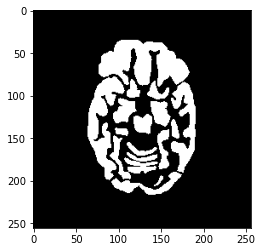

In [15]:
plt.imshow(digi_phantom[40],cmap="gray")

In [16]:
def rebin( a, newshape ):
        '''Rebin an array to a new shape.
        '''
        assert len(a.shape) == len(newshape)

        slices = [ slice(0,old, float(old)/new) for old,new in zip(a.shape,newshape) ]
        coordinates = np.mgrid[slices]
        indices = coordinates.astype('i')   #choose the biggest smaller integer index
        return a[tuple(indices)]

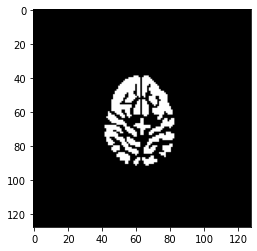

In [17]:
digi_phantom_r = rebin(255*np.dstack(digi_phantom), (128, 128, 47))
SLICENUM = 33
plt.imshow(digi_phantom_r[:,:,SLICENUM],cmap="gray")

In [3]:
from dipy import __version__ as dipy_version
import numpy as np
import sys

print("Using dipy version: ", dipy_version)
print("Using numpy version: ", np.__version__)
print("Using python version: ", sys.version)

from dipy.align import affine_registration
from dipy.io.image import load_nifti

folder = "D:/Hoffman/NiftiImages_PET"
pipeline = ["center_of_mass", "translation", "rigid"]

static_data, static_affine, static_img = load_nifti(os.path.join(folder, 'Aberdeen_01.nii'),return_img=True)
static = np.squeeze(static_data)[..., 0]
static_grid2world = static_affine

moving_data, moving_affine, moving_img = load_nifti(os.path.join(folder, 'Aberdeen_02.nii'),return_img=True)
moving = np.squeeze(moving_data)[..., 0]
moving_grid2world = moving_affine

xformed_img, reg_affine = affine_registration(
    moving, static,
    moving_affine = moving_grid2world,
    static_affine = static_grid2world,
    nbins = 32,
    metric = "MI",
    pipeline = pipeline,
    level_iters = [10000, 1000, 100],
    sigmas = [3.0, 1.0, 0.0],
    factors = [4, 2, 1]
)

Using dipy version:  1.6.0
Using numpy version:  1.24.2
Using python version:  3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


AttributeError: module 'numpy' has no attribute 'typeDict'

In [ ]:
# import time
# from pathlib import Path
# import matplotlib.pyplot as plt
# from miutil import plot

# import scipy.ndimage as ndi
# import nibabel as nib
# from scipy import ndimage

# # > NiftyPET image reconstruction/analysis
# from niftypet import nipet
# from niftypet import nimpa

# # > image registration and resampling
# import dipy
# from dipy.align import resample
# from dipy.align import (affine_registration, center_of_mass, translation,
#                         rigid, affine)

# # > import tools for ACR parameters,
# # > templates generation and I/O
# import acr_params as pars
# import acr_tmplates as ast
# import acr_ioaux as ioaux

1.6.0
1.24.2
